# AI Lab Splitter

### Data Processing

As always, we'll import the modules we need. No new imports yet.

In [22]:
import matplotlib.pyplot as plt

import copy
import random
import time

import pandas as pd
import re

from utils import concat_three_images, normalize_image, plot_one_image, plot_two_images, epoch_time, export_report
from dataset_modules import ResizeBinarizeEFF, AILabDatasetOne, AILabDatasetTwo, AILabDatasetThree

We'll also set the random seeds.

In [23]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

### Data Processing

In [24]:
transform = transforms.Compose([
                            ResizeBinarizeEFF(),
                            #transforms.Resize(pretrained_size),
                            transforms.ToTensor(),
                            transforms.Lambda(lambda x: torch.cat([x, x, x], 0))
                            #transforms.Normalize(mean = pretrained_means, std = pretrained_stds)
                       ])

Setting the path of images and csvs

pretrained_size = (224,224)
 transforms.Resize(pretrained_size),

In [25]:
TRAIN_DATA_PATH = '/mnt/nas/victor_splitter/data/isjeaai/df_train.parquet.gzip'  
VALID_DATA_PATH = '/mnt/nas/victor_splitter/data/isjeaai/df_val.parquet.gzip'
TEST_DATA_PATH = '/mnt/nas/victor_splitter/data/isjeaai/df_test.parquet.gzip'

Loading datasets

### Labels

In [26]:
df_train = pd.read_parquet(TRAIN_DATA_PATH)
df_val = pd.read_parquet(VALID_DATA_PATH)
df_test = pd.read_parquet(TEST_DATA_PATH)

In [27]:
def add_document_type(row):
    page_name = row['page_name']
    match = re.match(r"^[A-Z]+_\d+_\d+_(\d+).*$", page_name)
    if match:
        row['type'] = match[1]
    else:
        row['type'] = 'UNK'
    return row

In [28]:
df_test = df_test.apply(add_document_type, axis=1)
df_train = df_train.apply(add_document_type, axis=1)
df_val = df_val.apply(add_document_type, axis=1)

In [36]:
row = df_test.iloc[0]

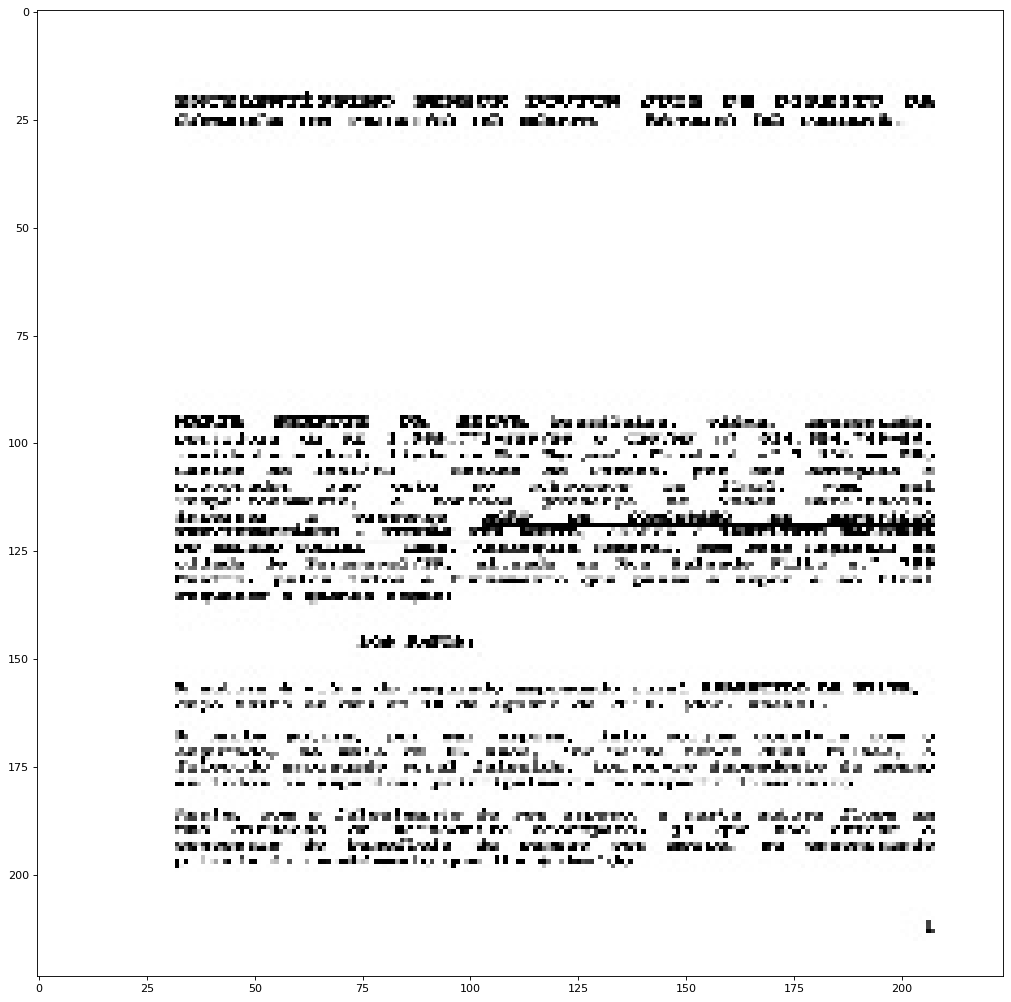

In [51]:
image = row.img

import base64
import io
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

figure(figsize=(20, 16), dpi=80)

i = base64.b64decode(image)
i = io.BytesIO(i)
i = mpimg.imread(i, format='PNG')

plt.imshow(i, cmap='gray')
plt.show()

### Data

In [30]:
train_data = AILabDatasetOne(df_train, 'class', transform )

valid_data = AILabDatasetOne(df_val, 'class', transform )

test_data = AILabDatasetOne(df_test, 'class', transform )

We'll print out the number of examples in each split to ensure they are correct.

In [31]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of test examples: {len(test_data)}')

Number of training examples: 20534
Number of validation examples: 5134
Number of test examples: 6121


We'll also plot out a few images to ensure the transformations look sensible - making sure to re-normalize our data so we can view it with the correct colors.

As we can see, the larger images mean we can get away with larger amounts of rotation and cropping with the images still looking reasonable.

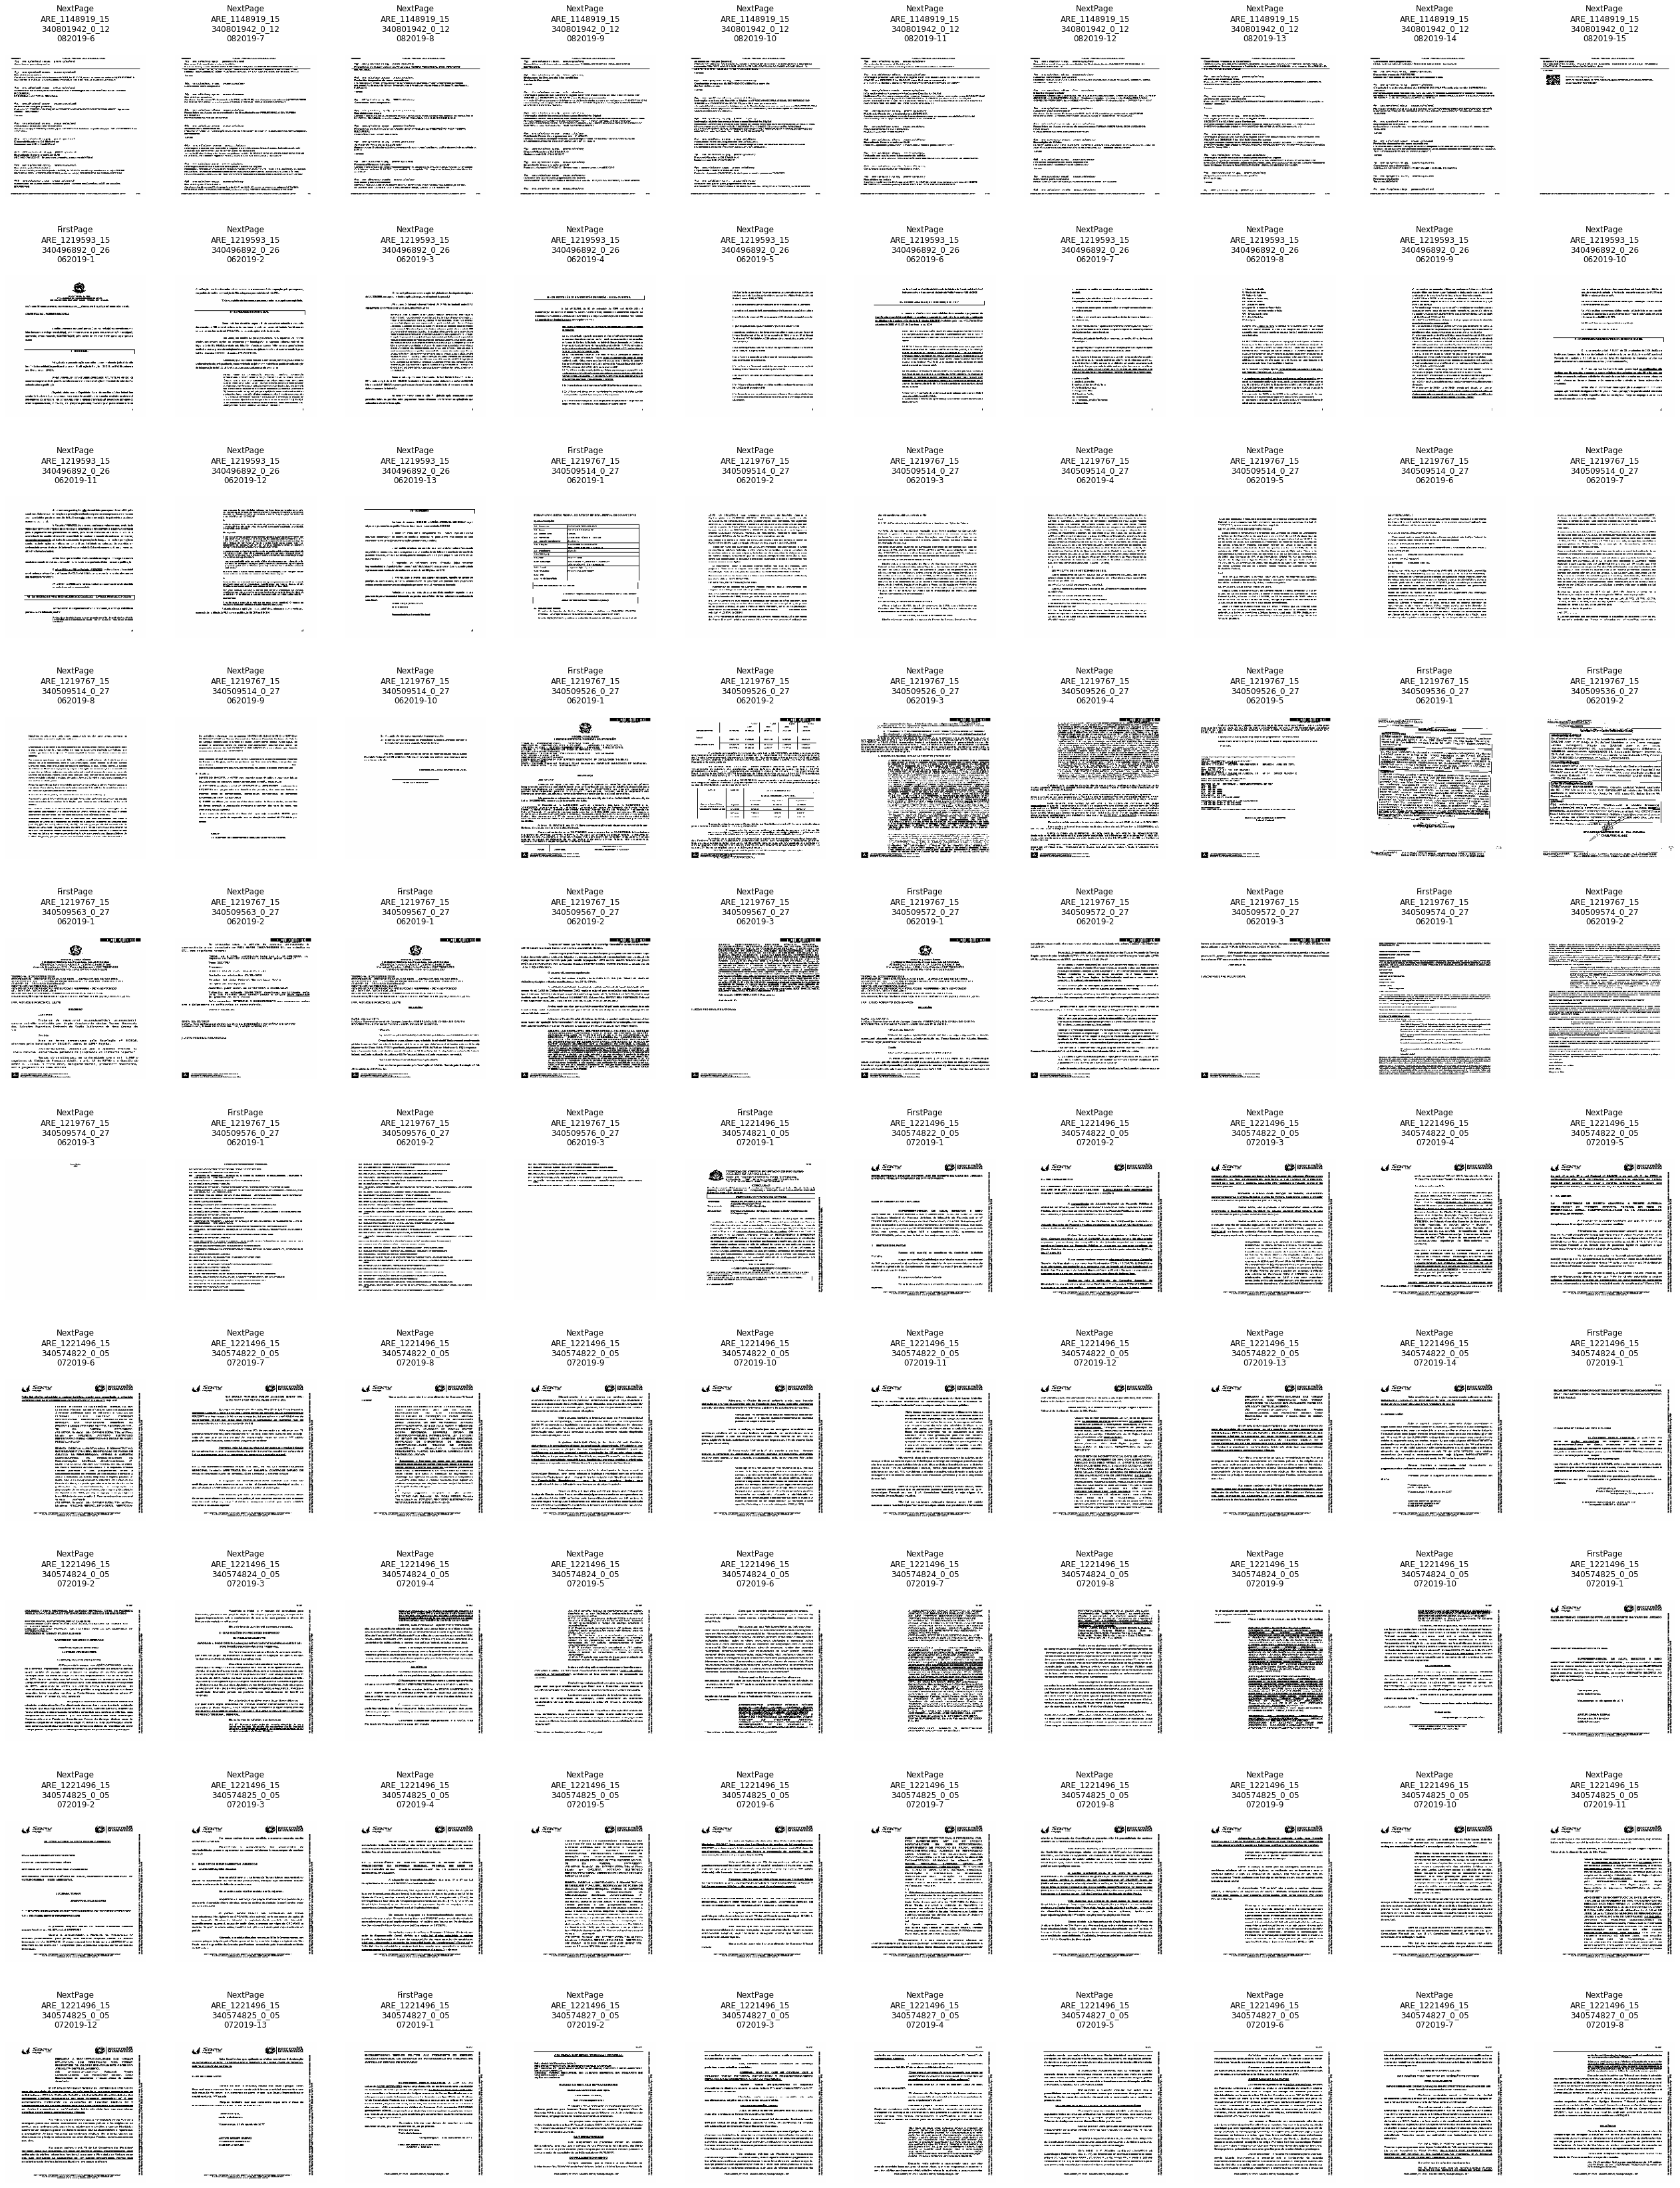

In [33]:
N_IMAGES = 100

images, labels, file_names = zip(*[(image, label, file_name) for image, label, file_name in 
                           [train_data[i+100] for i in range(N_IMAGES)]])

classes = {1: 'FirstPage', 0: 'NextPage'}

plot_one_image(images, labels, classes, file_names)

In [52]:
model = EfficientNet.from_pretrained('efficientnet-b0')
device = torch.device("cuda")
model.to(device)
dummy_input = torch.randn(optimal_batch_size, 3,224,224, dtype=torch.float).to(device)
repetitions=100
total_time = 0
with torch.no_grad():
    for rep in range(repetitions):
        starter, ender = torch.cuda.Event(enable_timing=True),   torch.cuda.Event(enable_timing=True)
        starter.record()
        _ = model(dummy_input)
        ender.record()
        torch.cuda.synchronize()
        curr_time = starter.elapsed_time(ender)/1000
        total_time += curr_time
Throughput =   (repetitions*optimal_batch_size)/total_time
print('Final Throughput:',Throughput)

NameError: name 'EfficientNet' is not defined